Help Sorce: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Importing libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# PCA Libraries
import pandas as pd
from sklearn import svm 
from sklearn.decomposition import PCA

C:\Users\Noor\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Loading dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape
len(train_labels)
train_images = train_images / 255.0

test_images = test_images / 255.0

In [3]:
train_images.shape

(60000, 28, 28)

COnverting Images, Train, Test set to 2D

In [4]:
nsamples, nx, ny = train_images.shape
d2_train_images = train_images.reshape((nsamples,nx*ny))
nnsamples, nnx, nny = test_images.shape
d2_test_images = test_images.reshape((nnsamples,nnx*nny))

In [5]:
d2_train_images.shape

(60000, 784)

In [6]:
from datetime import datetime
start=datetime.now()

Logistic regression without PCA

In [7]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(d2_train_images, train_labels)
# Predict for One Observation (image)
logisticRegr.predict(d2_test_images[0].reshape(1,-1))
# Predict for One Observation (image)
#logisticRegr.predict(d2_test_images[0:10])
predictions=logisticRegr.predict(d2_test_images)
logisticRegr.score(d2_test_images, test_labels)

0.8417

In [8]:
from sklearn.metrics import classification_report
#val_preds = np.argmax(predictions, axis=-1)
# y_pred = model.predict(x_test)
print(classification_report(test_labels, predictions ))
from sklearn.metrics import precision_recall_fscore_support
Precision, Recall, F1_Score, Average =precision_recall_fscore_support(test_labels, predictions, average='macro')
print(F1_Score)

             precision    recall  f1-score   support

          0       0.79      0.82      0.81      1000
          1       0.97      0.95      0.96      1000
          2       0.72      0.73      0.73      1000
          3       0.83      0.87      0.85      1000
          4       0.72      0.76      0.74      1000
          5       0.94      0.92      0.93      1000
          6       0.64      0.54      0.59      1000
          7       0.91      0.94      0.92      1000
          8       0.92      0.95      0.93      1000
          9       0.95      0.94      0.95      1000

avg / total       0.84      0.84      0.84     10000

0.8400796584531047


In [9]:
print (datetime.now()-start)

0:02:07.384611


In [10]:
from datetime import datetime
start=datetime.now()

Applying PCA on test and train data

In [11]:
pca = PCA(n_components=0.98) 
pca.fit(d2_train_images)
train_pca = pca.transform(d2_train_images)
#pca.fit(d2_test_images)
test_pca = pca.transform(d2_test_images)

In [12]:
d2_train_images.shape

(60000, 784)

In [13]:
train_pca.shape

(60000, 349)

In [14]:
d2_test_images.shape

(10000, 784)

In [15]:
test_pca.shape

(10000, 349)

In [16]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_pca, train_labels)
predictions=logisticRegr.predict(test_pca)
logisticRegr.score(test_pca, test_labels)

0.8416

In [17]:
from sklearn.metrics import classification_report
#val_preds = np.argmax(predictions, axis=-1)
print(classification_report(test_labels, predictions ))
from sklearn.metrics import precision_recall_fscore_support
Precision, Recall, F1_Score, Average =precision_recall_fscore_support(test_labels, predictions, average='macro')
print(F1_Score)

             precision    recall  f1-score   support

          0       0.79      0.81      0.80      1000
          1       0.98      0.96      0.97      1000
          2       0.72      0.73      0.73      1000
          3       0.82      0.87      0.85      1000
          4       0.72      0.77      0.75      1000
          5       0.94      0.92      0.93      1000
          6       0.64      0.53      0.58      1000
          7       0.90      0.94      0.92      1000
          8       0.91      0.95      0.93      1000
          9       0.95      0.94      0.95      1000

avg / total       0.84      0.84      0.84     10000

0.8396783015159734


In [18]:
print (datetime.now()-start)

0:01:51.218601


In [19]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

0

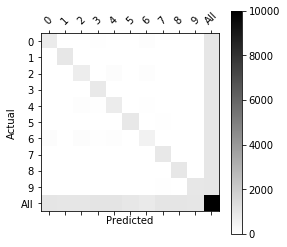

In [20]:
import pandas as pd 
df_confusion = pd.crosstab(test_labels, predictions )
df_confusion = pd.crosstab(test_labels, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
plot_confusion_matrix(df_confusion)

val_preds = np.argmax(predictions, axis=-1)
val_preds 